## Sieci wielowarstwowe

Perceptrony są zasadniczo ograniczone przez ich możliwości do dzielenia przestrzeni za pomocą hiperpłaszczyzn. Jeżeli grupy nie są liniowo separowalne, do ich klasyfikacji potrzebne są bardziej złożone mechanizmy, np. sieci wielowartwowe. Dodanie kolejnej warstwy na wyjściu poprzedniej pozwala na zbudowanie znacznie bardziej skomplikowanej funkcji podziału przestrzeni, wiąże się jednak z różnymi utrudnieniami, m.in. uczenia.


## Problem XOR
Zbudujemy prostą sieć neuronową z jedną warstwą ukrytą.
Wykorzystamy ją do rozwiązania problemu XOR. Jest to potencjalnie banalne zadanie, które jednak jest nieliniowe.\
W ramach przypomnienia, weźmy tabelę wartości logicznych XOR



X1  | X2  | Y_XOR

 0  | 0   | 0\
 0  | 1   | 1\
 1  | 0   | 1\
 1  | 1   | 0

Oczekujemy:
- Na wejściu: x1 i x2
- Na wyjściu: x1 XOR x2

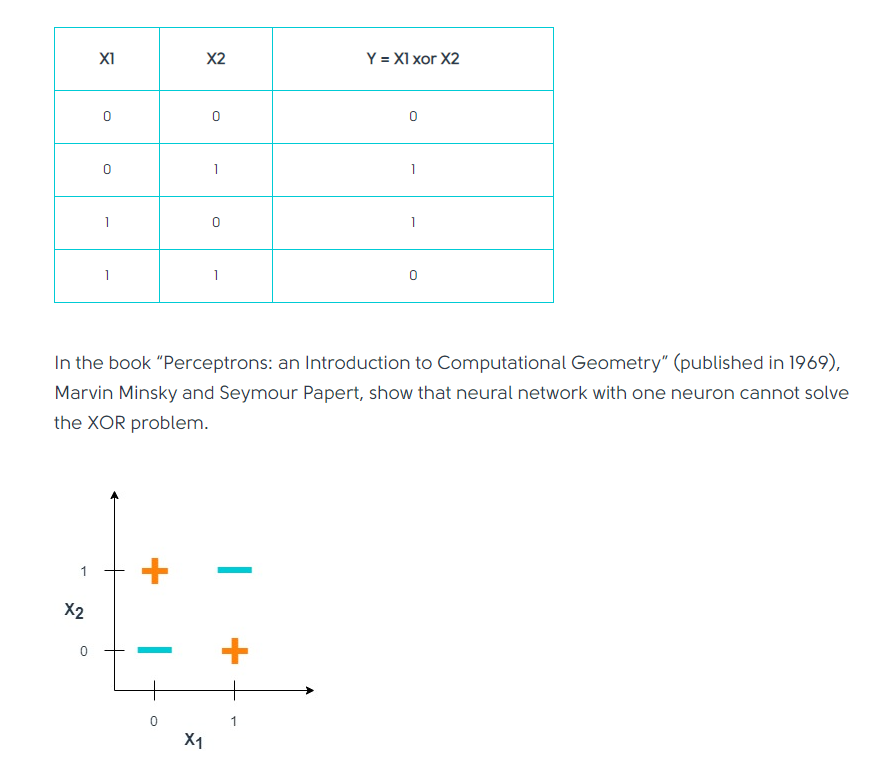

In [ ]:
import numpy as np

# tablica wejść
X = np.array([
    [1,1],
    [0,0],
    [1,0],
    [0,1]
], dtype=np.float32)
X

array([[1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# tablica oczekiwanych wyjść
y = np.array([
    0,
    0,
    1,
    1
], dtype=np.float32)
y

array([0., 0., 1., 1.], dtype=float32)

In [ ]:
# zastosowanie pojedynczego Perceptronu do rozwiazania problemu
from sklearn.linear_model import Perceptron

neuron = Perceptron(tol=1e-3, max_iter = 1000)

neuron.fit(X, y)

# możemy zobaczyć, że maksymalne accuracy, jakie jesteśmy w stanie osiągnąć, to 0.5. Nie jesteśmy w stanie tak podzielić przestrzeni jedną prostą,
# by podzieliła ją na dwie części zgodnie z problemem XOR.
print('score:', neuron.score(X, y))
print('predictions:', neuron.predict(X))

score: 0.5
predictions: [0. 0. 0. 0.]


In [ ]:
# zastosowanie do tego samego problemu prostej sieci wielowarstwowej
from sklearn.neural_network import MLPClassifier

# tworzymy sieć z 5 neuronami na wejściu i 5 neuronami w warstwie ukrytej
model = MLPClassifier(hidden_layer_sizes = (5,5), max_iter=2000)

# możemy zobaczyć, że teraz już wyjście powinno zgadzać się z naszymi oczekiwaniami
model.fit(X, y)
print('score:', model.score(X,y))
print('predictions:', model.predict(X))

score: 1.0
predictions: [0. 0. 1. 1.]


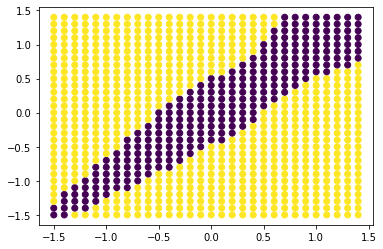

In [ ]:
# nie jest już tak łatwo narysować funkcji podziału przestrzeni, bo jej wzór zrobił się znacznie bardziej skomplikowany.
# Jeżeli jednak chcemy zobaczyć przybliżony podział, możemy zobaczyć, jak będą wyglądały predykcje dla siatki punktów.
import matplotlib.pyplot as plt

# tymi funkcjami zbudujemy siatkę 2d
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.1), np.arange(-1.5, 1.5, 0.1))
test_points = np.transpose(np.vstack((np.ravel(xx),np.ravel(yy))))

# robimy predykcję dla naszych punktów
prediction = model.predict(test_points)
plt.scatter(test_points[:,0], test_points[:,1], c=prediction)

### Różne funkcje aktywacji

Klasyczny perceptron używa głównie prostej schodkowej funkcji aktywacji, jednak w praktyce częściej wykorzystuje się funkcje pozwalające na łatwiejszą interpretację wyniku i na liczenie pochodnej po tym wyniku (co jest potrzebne do uczenia). Przykładowe funkcje wykorzystywane w sieciach neuronowych:

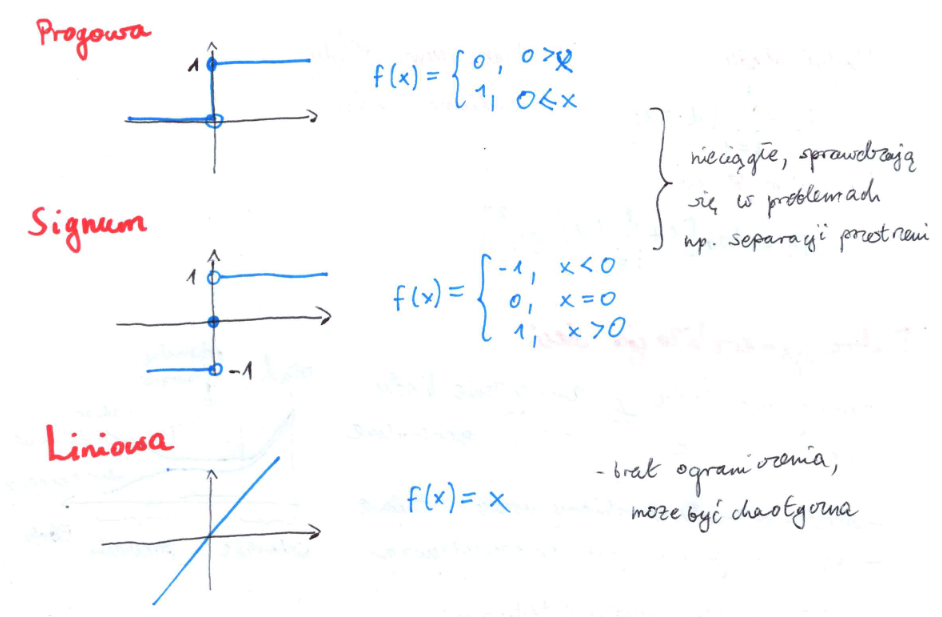

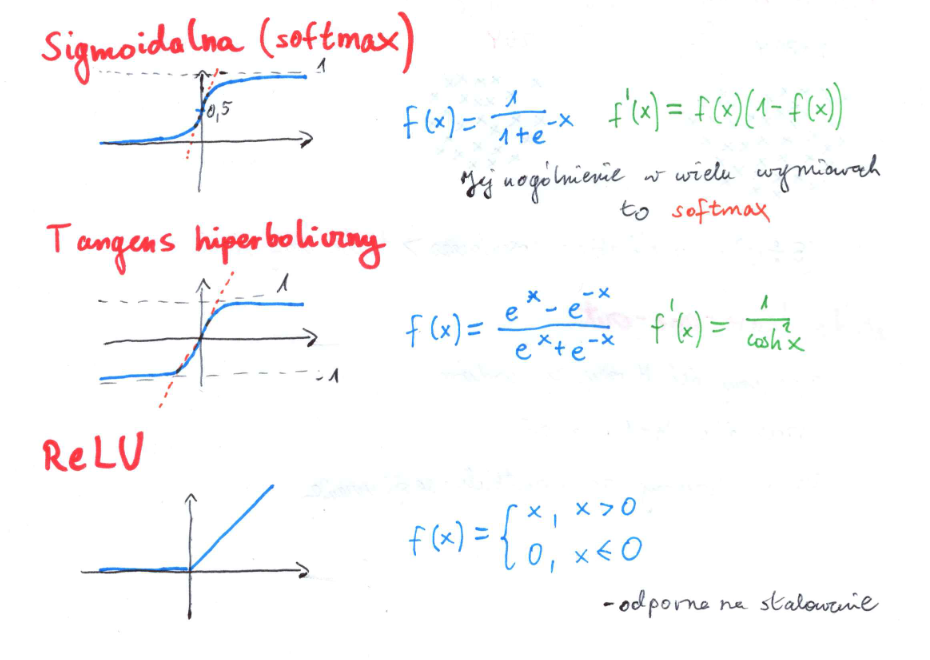

Teraz przyjrzyjmy się sieci ułożonej z kilku warstw:

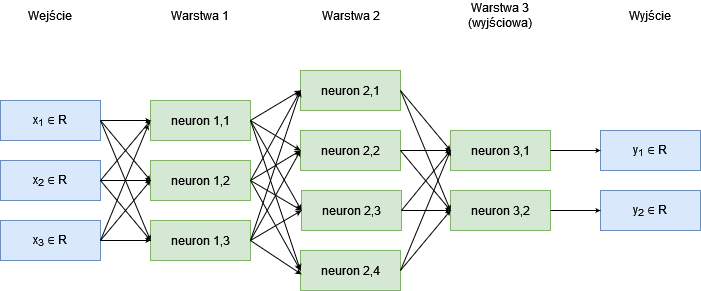

Jeżeli zamierzamy przeprowadzić uczenie sieci z nauczycielem, nie możemy tego zrobić prostymi metodami takimi jak metoda Widrowa-Hoffa ze względu na ukrytą warstwę. Zamiast tego używamy algorytmów, które:


*   Liczą **pochodną funkcji błędu** po każdej wadze i każdym biasie
*   Przesuwają wagę zgodnie z pochodną w stronę jej minimum

Najprościej można przedstawić działanie algorytmów optymalizujących wagi jako:

$W^{iter+1} = W^{iter} + f(\nabla E)$

Gdzie $E$ jest funkcją błędu pomiędzy oczekiwanym a faktycznym wyjściem. W najprostszym algorytmie (Gradient Descent) wagi są aktualizowane po prostu jako:

$W^{iter+1} = W^{iter} - r \nabla E$

Gdzie $r$ jest tzw. współczynnikiem uczenia, jakąś małą stałą służącą do skalowania tego, jak bardzo przesuwane są wagi w każdej iteracji. W lepszych algorytmach, takich jak ADAM, współczynnik ten jest liczony od nowa w każdej iteracji, dopasowując rozmiar kroku do warunków.

Jak policzyć pochodne błędu sieci po każdej wadze? Używając **twierdzenia o pochodnej funkcji złożonej**:

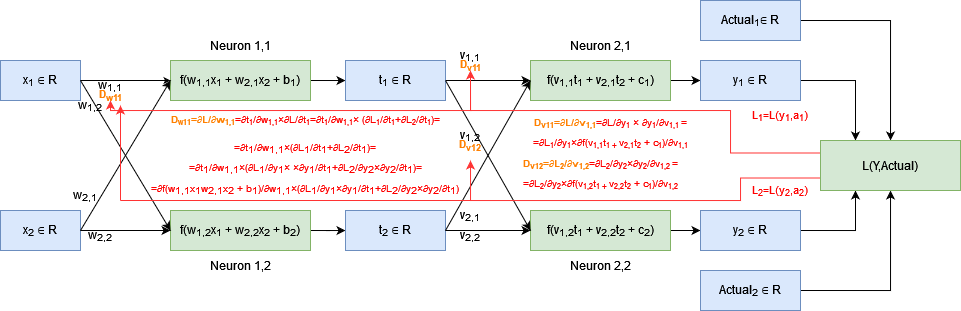

Ze względu na to, że na początku liczymy błąd dla warstwy najbliżej wyjścia, a później idziemy coraz głębiej w stronę wejścia, nazywamy ten proces **propagacją wsteczną** (backpropagation).

### Jak dobrać strukturę sieci?

Jest to bardzo złożone zagadanienie, którego automatyzacja jest dopiero rozwijana (większość badań pochodzi z 2019 i później).


*   Więcej neuronów - więcej informacji, bardziej złożone separacje przestrzeni lub aproksymacje funkcji, zdolność do rozwiązywania bardziej skomplikowanych problemów
*   Mniej neuronów - szybsze uczenie, mniejsze ryzyko przeuczenia, lepsza generalizacja problemów

### Dobra generalizacja problemu

Chcemy, żeby sieci dobrze radziły sobie nie tylko z naszym zbiorem wykorzystanym do ich uczenia, ale żeby raczej odnalazły separację występującą faktycznie "w rzeczywistości", żeby dało się je wykorzystywać do prawdziwych problemów automatyzacji. Zbyt wiele epok uczenia może doprowadzić do tzw. **przeuczenia sieci**, czyli do momentu, w którym sieć polepsza wyniki na zbiorze uczącym kosztem gorszych wyników na ogólnym problemie.

Zastanówmy się nad generalizacją problemów na przykładzie poniższego podziału przestrzeni:

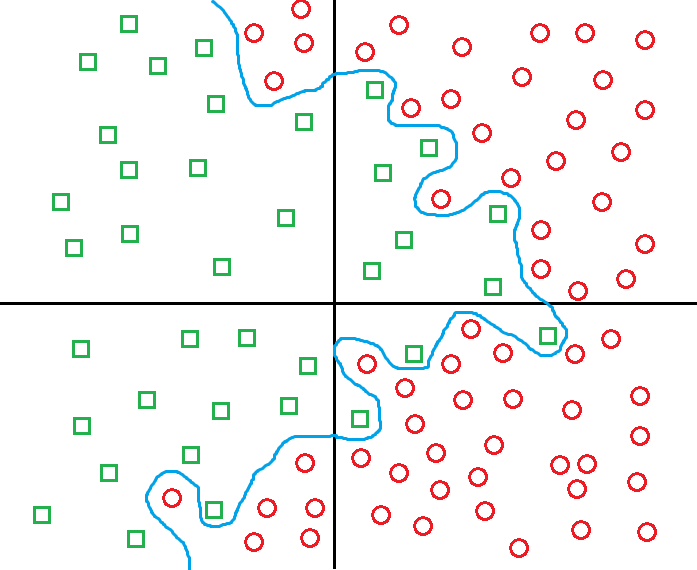

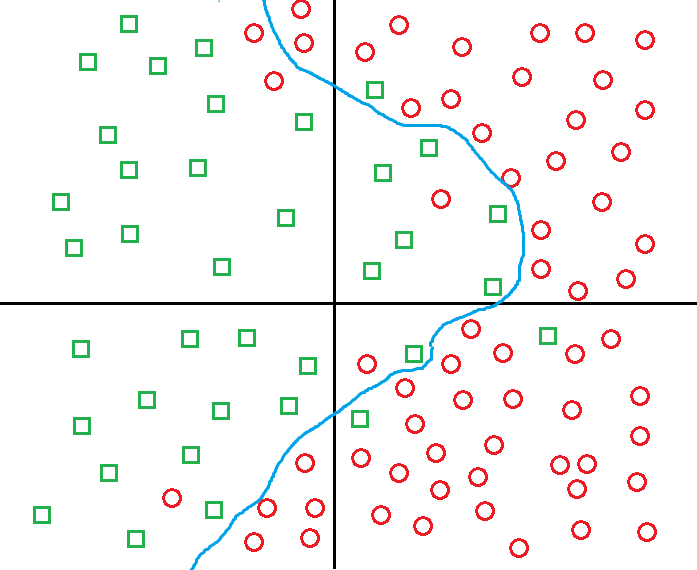

In [ ]:
# teraz spróbujmy już zaimplementować wielowarstową sieć neuronową do bardziej złożonego problemu.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)


# odsyłamy oczywiście do dokumentacji po wyjaśnienie argumentów, ale pokrótce:
# solver - algorytm uczący, SGD = Stochastic Gradient Descent
# hidden_layer_sizes - rozmiary ukrytych warstw
# activation - funkcja aktywacji, identity = liniowa

network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'identity')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_train)
matrix = confusion_matrix(y_train, predicted_labels)
matrix

In [ ]:
network.score(X_train,y_train)

In [ ]:
predicted_labels_test = network.predict(X_test)
matrix_test = confusion_matrix(y_test,predicted_labels_test)
matrix_test

In [ ]:
network.score(X_test,y_test)

In [ ]:
# możemy jak zwykle zobaczyć wagi neuronów...
network.coefs_

In [ ]:
# ...i biasy:
network.intercepts_

## Zadania do samodzielnego wykonania

1.

Proszę pobrać plik treatment.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować jak sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) i jak wygląda poprawny podział zbioru. Proszę przedstawić wyniki dla 5-8 różnych struktur sieci.

2.

Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits( ) w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

3.

Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek.

4.

Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru (uwaga, wymagana jest zamiana etykiet tekstowych w ostatniej kolumnie na liczbowe - można je zamienić ręcznie albo przy użyciu takich narzędzi jak https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html, proszę jednak pamiętać, że nie musi on ułożyć tych etykiet po kolei). Proszę pamiętać, że liczności różnych klas wewnątrz zbioru są _bardzo_ nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego). Czy trafność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

#### Materiały:

Dokumentacja:

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

Dla bardziej ambitnych polecamy zbiór ręcznie pisanych cyfr MNIST.

#Rozwiązania zadań

Zad 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hidden layer size: 2x2
Accuracy: 0.5857740585774058


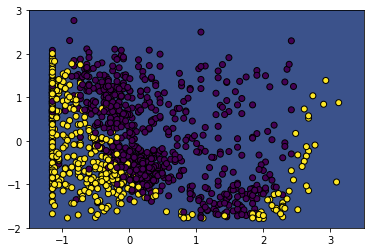


Hidden layer size: 2x5
Accuracy: 0.8577405857740585


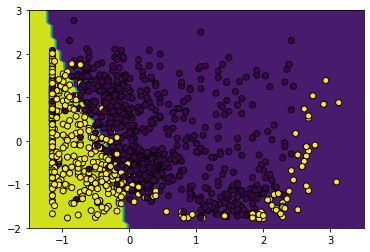


Hidden layer size: 2x10
Accuracy: 0.8661087866108786


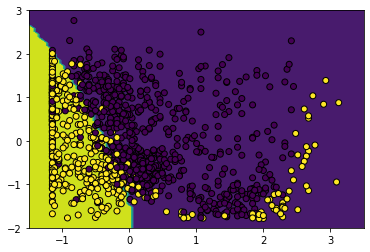


Hidden layer size: 5x2
Accuracy: 0.5564853556485355


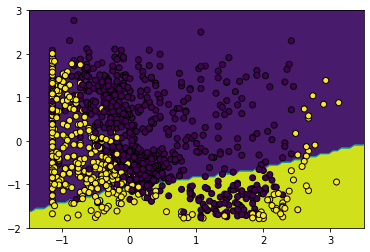


Hidden layer size: 5x5
Accuracy: 0.8744769874476988


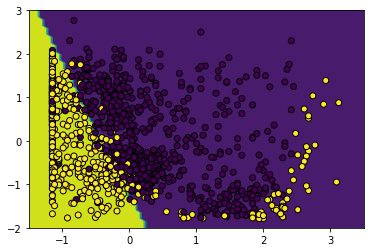


Hidden layer size: 5x10
Accuracy: 0.8828451882845189


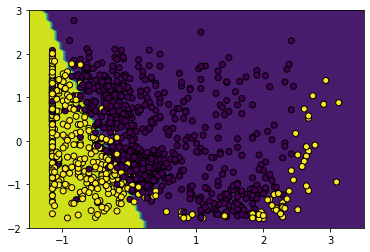


Hidden layer size: 10x2
Accuracy: 0.8828451882845189


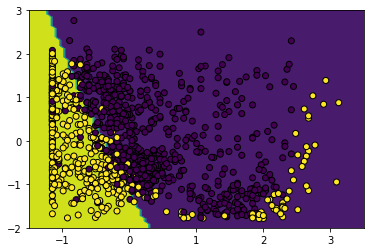


Hidden layer size: 10x5
Accuracy: 0.8786610878661087


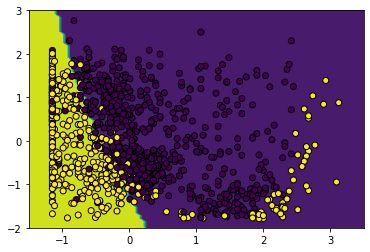


Hidden layer size: 10x10
Accuracy: 0.8786610878661087


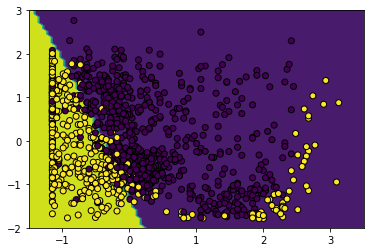

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from google.colab.drive import mount
import numpy as np
import matplotlib.pyplot as plt

mount('/content/drive')
data = np.loadtxt('/content/drive/MyDrive/treatment.txt', delimiter=",")
sample = data[:, 0:2]
labels = data[:, 2]
scaler = StandardScaler()
sample = scaler.fit_transform(sample, labels)
X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size=0.2, stratify=labels, random_state=22)

for input in [2, 5, 10]:
  for hidden in [2, 5, 10]:
    network = MLPClassifier(solver='sgd',hidden_layer_sizes=(input, hidden), max_iter = 1000, tol = 0.001, activation = 'tanh')
    network.fit(X_train, y_train)

    print(f"Hidden layer size: {input}x{hidden}")
    print(f"Accuracy: {network.score(X_test, y_test)}")
    display = DecisionBoundaryDisplay.from_estimator(network, sample, response_method="predict")
    display.ax_.scatter(sample[:, 0], sample[:, 1], c=labels, edgecolor="k")
    plt.xlim(-1.5, 3.5)
    plt.ylim(-2, 3)
    plt.show()
    print()

Niestety skrypt nie potrafi odpowiednio narysować niektórych konfiguracji regionów decyzyjnych (szczególnie dla tych najciekawszych funkcji aktywacji)

Zad 2

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target, random_state=22)

network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'identity')
network.fit(X_train, y_train)

print(f"Accuracy: {network.score(X_test, y_test)}")

Accuracy: 0.925


Zad 3

In [1]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target, random_state=22)

for solver_func in ['lbfgs', 'sgd', 'adam']:
  for activation_func in ['identity', 'logistic', 'tanh', 'relu']:
    for input in [2, 5, 10]:
      for hidden in [2, 5, 10]:
          network = MLPClassifier(solver=solver_func, hidden_layer_sizes=(input, hidden), max_iter=1000, tol = 0.001, activation = activation_func)
          network.fit(X_train, y_train)
          accuracy = network.score(X_test, y_test)
          print(f"Solver: {solver_func} \nActivation function: {activation_func} \nArchitecture: ({input}, {hidden}) \nScore: {accuracy} \n\n\n")

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: identity 
Architecture: (2, 2) 
Score: 0.7055555555555556 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: identity 
Architecture: (2, 5) 
Score: 0.7166666666666667 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: identity 
Architecture: (2, 10) 
Score: 0.7361111111111112 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: identity 
Architecture: (5, 2) 
Score: 0.7277777777777777 



Solver: lbfgs 
Activation function: identity 
Architecture: (5, 5) 
Score: 0.9222222222222223 



Solver: lbfgs 
Activation function: identity 
Architecture: (5, 10) 
Score: 0.9333333333333333 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: identity 
Architecture: (10, 2) 
Score: 0.75 



Solver: lbfgs 
Activation function: identity 
Architecture: (10, 5) 
Score: 0.925 



Solver: lbfgs 
Activation function: identity 
Architecture: (10, 10) 
Score: 0.9638888888888889 



Solver: lbfgs 
Activation function: logistic 
Architecture: (2, 2) 
Score: 0.28055555555555556 



Solver: lbfgs 
Activation function: logistic 
Architecture: (2, 5) 
Score: 0.29444444444444445 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: logistic 
Architecture: (2, 10) 
Score: 0.3194444444444444 



Solver: lbfgs 
Activation function: logistic 
Architecture: (5, 2) 
Score: 0.3861111111111111 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: logistic 
Architecture: (5, 5) 
Score: 0.5694444444444444 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: logistic 
Architecture: (5, 10) 
Score: 0.6611111111111111 



Solver: lbfgs 
Activation function: logistic 
Architecture: (10, 2) 
Score: 0.49444444444444446 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: logistic 
Architecture: (10, 5) 
Score: 0.8944444444444445 



Solver: lbfgs 
Activation function: logistic 
Architecture: (10, 10) 
Score: 0.9277777777777778 



Solver: lbfgs 
Activation function: tanh 
Architecture: (2, 2) 
Score: 0.18888888888888888 



Solver: lbfgs 
Activation function: tanh 
Architecture: (2, 5) 
Score: 0.1 



Solver: lbfgs 
Activation function: tanh 
Architecture: (2, 10) 
Score: 0.4027777777777778 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: tanh 
Architecture: (5, 2) 
Score: 0.46944444444444444 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: tanh 
Architecture: (5, 5) 
Score: 0.5472222222222223 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: tanh 
Architecture: (5, 10) 
Score: 0.7166666666666667 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: tanh 
Architecture: (10, 2) 
Score: 0.7611111111111111 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: tanh 
Architecture: (10, 5) 
Score: 0.7861111111111111 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: tanh 
Architecture: (10, 10) 
Score: 0.8722222222222222 



Solver: lbfgs 
Activation function: relu 
Architecture: (2, 2) 
Score: 0.10277777777777777 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: relu 
Architecture: (2, 5) 
Score: 0.3 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: relu 
Architecture: (2, 10) 
Score: 0.7055555555555556 



Solver: lbfgs 
Activation function: relu 
Architecture: (5, 2) 
Score: 0.4666666666666667 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: relu 
Architecture: (5, 5) 
Score: 0.7166666666666667 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: relu 
Architecture: (5, 10) 
Score: 0.675 



Solver: lbfgs 
Activation function: relu 
Architecture: (10, 2) 
Score: 0.1 



Solver: lbfgs 
Activation function: relu 
Architecture: (10, 5) 
Score: 0.3138888888888889 





/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs 
Activation function: relu 
Architecture: (10, 10) 
Score: 0.6972222222222222 



Solver: sgd 
Activation function: identity 
Architecture: (2, 2) 
Score: 0.6333333333333333 



Solver: sgd 
Activation function: identity 
Architecture: (2, 5) 
Score: 0.7222222222222222 



Solver: sgd 
Activation function: identity 
Architecture: (2, 10) 
Score: 0.725 



Solver: sgd 
Activation function: identity 
Architecture: (5, 2) 
Score: 0.5666666666666667 



Solver: sgd 
Activation function: identity 
Architecture: (5, 5) 
Score: 0.9333333333333333 



Solver: sgd 
Activation function: identity 
Architecture: (5, 10) 
Score: 0.9527777777777777 



Solver: sgd 
Activation function: identity 
Architecture: (10, 2) 
Score: 0.6361111111111111 



Solver: sgd 
Activation function: identity 
Architecture: (10, 5) 
Score: 0.9166666666666666 



Solver: sgd 
Activation function: identity 
Architecture: (10, 10) 
Score: 0.9611111111111111 



Solver: sgd 
Activation function: logistic 
Arc

Wybrałem 3 architektury, dla których wyniki byłly bardzo dokładne oraz 3 dla których wyniki były niskiej jakości. Poniższy kod wypisuje macierze pomyłek dla tych architektur.

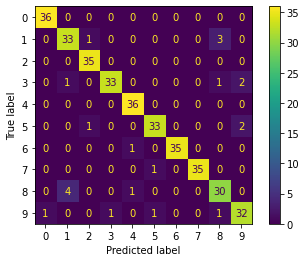

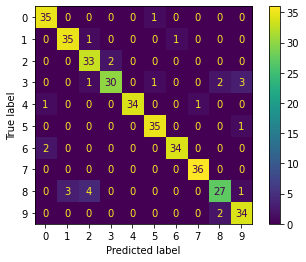

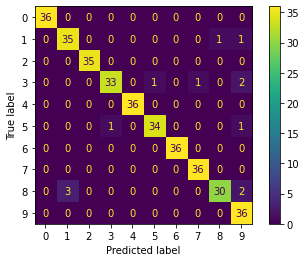

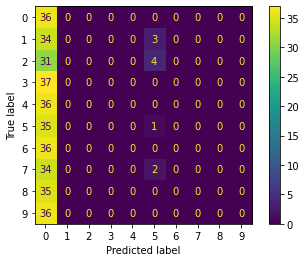

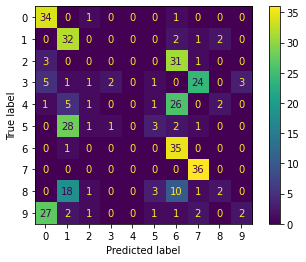

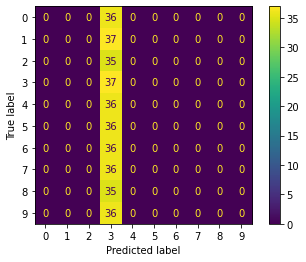

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target, random_state=22)

network = MLPClassifier(solver='adam', hidden_layer_sizes=(10, 10), max_iter=1000, activation = 'relu', tol = 0.001)
network.fit(X_train, y_train)
cm = ConfusionMatrixDisplay.from_estimator(network, X_test, y_test)
plt.show()
print()

network = MLPClassifier(solver='adam', hidden_layer_sizes=(10, 10), max_iter=1000, activation = 'logistic', tol = 0.001)
network.fit(X_train, y_train)
cm = ConfusionMatrixDisplay.from_estimator(network, X_test, y_test)
plt.show()
print()

network = MLPClassifier(solver='adam', hidden_layer_sizes=(10, 10), max_iter=1000, activation = 'identity', tol = 0.001)
network.fit(X_train, y_train)
cm = ConfusionMatrixDisplay.from_estimator(network, X_test, y_test)
plt.show()
print()


network = MLPClassifier(solver='sgd', hidden_layer_sizes=(10, 10), max_iter=1000, activation = 'logistic', tol = 0.001)
network.fit(X_train, y_train)
cm = ConfusionMatrixDisplay.from_estimator(network, X_test, y_test)
plt.show()
print()


network = MLPClassifier(solver='adam', hidden_layer_sizes=(2, 10), max_iter=1000, activation = 'tanh', tol = 0.001)
network.fit(X_train, y_train)
cm = ConfusionMatrixDisplay.from_estimator(network, X_test, y_test)
plt.show()
print()


network = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 2), max_iter=1000, activation = 'relu', tol = 0.001)
network.fit(X_train, y_train)
cm = ConfusionMatrixDisplay.from_estimator(network, X_test, y_test)
plt.show()
print()

In [6]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target, random_state=22)

for activation_func in ['identity', 'logistic', 'tanh', 'relu']:
  for learning in ['constant', 'adaptive', 'invscaling']:
            network = MLPClassifier(solver='sgd', hidden_layer_sizes=(10, 10), max_iter=1000, tol = 0.001, activation = activation_func, learning_rate=learning)
            network.fit(X_train, y_train)
            accuracy = network.score(X_test, y_test)
            print(f"Activation function: {activation_func} \nArchitecture: ({input}, {hidden}) \nLearnin rate: {learning}\nLearning rate anit: {init}\nScore: {accuracy} \n\n\n")

Activation function: identity 
Architecture: (10, 10) 
Learnin rate: constant
Learning rate anit: 0.01
Score: 0.9694444444444444 



Activation function: identity 
Architecture: (10, 10) 
Learnin rate: adaptive
Learning rate anit: 0.01
Score: 0.9666666666666667 



Activation function: identity 
Architecture: (10, 10) 
Learnin rate: invscaling
Learning rate anit: 0.01
Score: 0.45555555555555555 



Activation function: logistic 
Architecture: (10, 10) 
Learnin rate: constant
Learning rate anit: 0.01
Score: 0.2611111111111111 



Activation function: logistic 
Architecture: (10, 10) 
Learnin rate: adaptive
Learning rate anit: 0.01
Score: 0.21388888888888888 



Activation function: logistic 
Architecture: (10, 10) 
Learnin rate: invscaling
Learning rate anit: 0.01
Score: 0.09722222222222222 



Activation function: tanh 
Architecture: (10, 10) 
Learnin rate: constant
Learning rate anit: 0.01
Score: 0.9166666666666666 



Activation function: tanh 
Architecture: (10, 10) 
Learnin rate: a

Ustawienia "constant" i "adaptive" dają podobne wyniki, natomiast "invscaling" powoduje, że wyniki są widocznie gorsze.

Zad 4

Accuracy: 0.5589225589225589


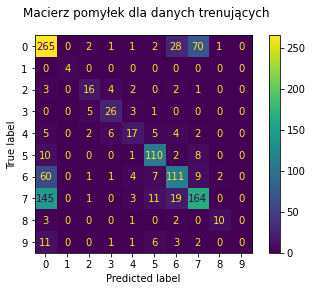

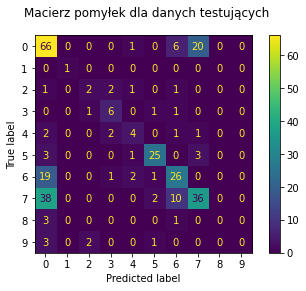

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


#Wczytanie danych z datesetu
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
names = ['Sequence Name', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5', 'Gene_6', 'Gene_7', 'Gene_8', 'Class']
data = pd.read_csv(url, delim_whitespace=True, names=names)

#Zakodowanie klas jako liczb
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

#Podzielenie danych na trenujące i uczące
y = data['Class']
X = data.drop(['Sequence Name', 'Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 10, 10), max_iter = 1000, tol = 0.001, activation = 'relu')
# network.fit(X_train, y_train)

#Poszukiwanie najlepszych parametrów sieci neuronowej
# for solver_func in ['lbfgs', 'sgd', 'adam']:
#   for activation_func in ['identity', 'logistic', 'tanh', 'relu']:
#     for input in [2, 5, 10]:
#       for hidden in [2, 5, 10]:
#           network = MLPClassifier(solver=solver_func, hidden_layer_sizes=(input, hidden), max_iter=1000, tol = 0.001, activation = activation_func)
#           network.fit(X_train, y_train)
#           accuracy = network.score(X_test, y_test)
#           print(f"Solver: {solver_func} \nActivation function: {activation_func} \nArchitecture: ({input}, {hidden}) \nScore: {accuracy} \n\n\n")

network = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1000, tol = 0.001, activation = 'identity')
network.fit(X_train, y_train)

print(f"Accuracy: {network.score(X_test, y_test)}")

cm = ConfusionMatrixDisplay.from_estimator(network, X_train, y_train)
cm.figure_.suptitle("Macierz pomyłek dla danych trenujących")
plt.show()
print()

cm  = ConfusionMatrixDisplay.from_estimator(network, X_test, y_test)
cm.figure_.suptitle("Macierz pomyłek dla danych testujących")
plt.show()

Dokładność 0.5 dla tego datasetu wydaje się być stosunkowo dobra. Większość konfiguracji sieci wykazywała mniejszą dokładność. Moim zdaniem jest to spowodowane dużąnierównością liczności obiektów w każdej klasie (najliczniejsza ma 463, a najmniej liczna 5). Z tego powodu sieć nie jest w stanie nauczyć się rozpoznawania tych mniej licznych klas.